In [4]:
# Import pandas and load the XLS file
import pandas as pd

df = pd.read_csv('Concrete_Data.csv')

# Rename columns to shorter names for convenience
df.columns = [
    'Cement', 
    'Blast_Furnace_Slag', 
    'Fly_Ash', 
    'Water', 
    'Superplasticizer', 
    'Coarse_Aggregate', 
    'Fine_Aggregate', 
    'Age', 
    'Strength'
]

# Display the first few rows to confirm data loaded correctly
df.head()


,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Code Explanation:

- **Import pandas:** I use the `pandas` library for data handling and manipulation.
- **`df = pd.read_csv('Concrete_Data.csv')`:** Reads the CSV file into a DataFrame named `df`.
- **Renaming columns:** I assign shorter names (`df.columns = [...]`) to make column references simpler and more readable in subsequent steps.
- **`df.head()`:** Displays the first five rows of the dataset, helping to verify that the data loaded correctly and check the new column names.

---

#### Why This Step?

- **Load the dataset:** It’s essential to import the dataset before any analysis or preprocessing can occur.
- **Rename columns:** Long or unwieldy column names can slow down development and clutter the code; shorter names improve clarity and reduce errors.
- **Inspect the first rows:** Quickly confirms whether the dataset has been read properly, ensuring we have the right structure, column headings, and data format before proceeding.

In [6]:
# Import functions for splitting the data and scaling features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the features (X) from the target (y)
X = df.drop('Strength', axis=1)
y = df['Strength']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the StandardScaler to scale our features
scaler = StandardScaler()

# Fit the scaler on the training features and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the scaled training data
print("Training data shape:", X_train_scaled.shape)


Training data shape: (824, 8)


#### Code Explanation:
- **Importing essential functions:**
    - `train_test_split` is used to split the dataset into training and testing subsets.
    - `StandardScaler` is used for feature scaling (normalising or standardising feature values).
- **Feature/target separation:**
    - `X = df.drop('Strength', axis=1)` defines all columns except `'Strength'` as input features.
    - `y = df['Strength']` isolates the target variable we aim to predict.
- **Splitting the data:**
    - `train_test_split(X, y, test_size=0.2, random_state=42)` creates two sets of features (`X_train`, `X_test`) and two sets of targets (`y_train`, `y_test`) with 80% data for training and 20% data for testing, ensuring reproducibility with `random_state=42`.
- **Scaling the features:**
    - I create an instance of `StandardScaler()` and then call `fit_transform` on the training features to compute scaling parameters and apply them.
    - I use the same scaling parameters to transform the test set (`transform`) without re-fitting, ensuring the same scaling approach for both sets.
- **Print shape of training data:**
    - `print("Training data shape:", X_train_scaled.shape)` confirms the dimensions of the scaled training feature matrix.

---

#### Why This Step?

- **Data splitting:** Separating the data into training and testing sets helps assess model generalisation. Training on one subset and validating on another prevents overfitting.
- **Feature scaling:** Neural networks (and many other machine learning algorithms) often perform better when input features share a similar scale. Standardisation ensures each feature has zero mean and unit variance, speeding up convergence and potentially improving accuracy.

In [7]:
# Import TensorFlow and Keras components for building the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential([
    # Input layer with 64 neurons; 'input_shape' matches the number of features (8)
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    
    # Hidden layer with 32 neurons and ReLU activation for non-linearity
    Dense(32, activation='relu'),
    
    # Output layer with 1 neuron for regression; linear activation is used by default
    Dense(1)
])

# Compile the model using the Adam optimizer and mean squared error loss for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary to see the architecture
model.summary()


C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

#### Code Explanation:

- **Imports:**
    - `tensorflow` for building and training neural networks.
    - `Sequential` to define a linear stack of layers.
	    - `Sequential` is a Keras model class that lets me stack layers in a linear pipeline: each layer receives the output from the previous layer and feeds its output to the next layer.
	    - It is used for straightforward architectures where each layer directly follows another.
    - `Dense` to add fully connected (dense) layers in the network.
	    - A `Dense` layer is a fully connected layer, meaning every neuron in the layer is connected to every neuron in the preceding layer.
	    - Dense layers are a standard choice for general-purpose neural networks, especially for tabular data. They help combine information from all features.
- **Defining the model:**
    - **First Dense layer**: has 64 neurons and uses `relu` activation to introduce non-linearity. The `input_shape=(X_train_scaled.shape[1],)` specifies the number of input features.
    - **Second Dense layer**: has 32 neurons, also with `relu` activation. This reduces the dimensionality from 64 to 32.
    - **Output Dense layer**: has 1 neuron and no explicit activation (default is linear).
	    - We start with 64 neurons, then go down to 32, and finally 1 for the output. Each layer’s size (number of neurons) is a **hyperparameter** you can tune.
	    - Decreasing layer sizes is a simple way to gradually condense information. The final output layer has a single neuron because we’re predicting one numeric value (concrete strength).
	    - ReLU outputs `max(0, x)`, introducing non-linearity and avoiding some issues (like vanishing gradients) that older activation functions had.
		- It’s efficient, widely used in modern neural networks, and typically speeds up training convergence.
			- **Vanishing Gradient Problem**
				- **What Is It?**  
					 In deep neural networks, especially those with many layers and certain activation functions, gradients (the signals used to update weights) can become extremely small as they propagate backward through the network.
				- **Why Problematic?**  
				     When gradients vanish, early layers learn very slowly because their weight updates are near zero. This severely limits a network’s ability to learn complex patterns. Modern activation functions (like ReLU) and proper initialization strategies can help mitigate this issue.
- **Compiling the model:**
    - **optimizer='adam'**: Adaptive Moment Estimation (Adam) is an efficient choice for most neural network tasks.
	    - Adam (Adaptive Moment Estimation) is an algorithm that optimises model parameters using an adaptive learning rate and momentum.
	    - It generally converges faster and more reliably than simpler optimizers like Stochastic Gradient Descent (SGD). 
    - **loss='mse'**: Mean Squared Error is the standard regression loss function.
	    - MSE calculates the average squared difference between predicted and actual values.
	    - It’s a standard metric for regression tasks and directly corresponds to the variance of prediction errors. Minimising MSE encourages the model to make smaller errors overall.
	    - Mean Absolute Error (`mae`) can also be used as a loss function; it is sometimes more robust to outliers but can be trickier to optimize smoothly.
    - **metrics=['mae']**: We track Mean Absolute Error as an additional performance indicator.
	    - MAE computes the average absolute difference between predicted and actual values.
	    - It’s more interpretable in many real-world tasks (e.g., “the model is off by X units on average”). It also helps you track a different perspective on error compared to the MSE loss.
	    - You could track other regression metrics like `R^2` or `Mean Squared Logarithmic Error`, depending on the problem requirements.
- **`model.summary()`:**
    - Prints a table summarizing each layer’s output shape and total parameters, offering a quick glimpse of the network’s complexity.


---

#### Why This Step?

- **Model Definition**: Specifying the architecture (how many layers, neurons, and activation functions) is crucial for capturing the relationship between inputs and outputs.
- **Compilation**: Tells the model _how_ to optimize its parameters (via `optimizer`) and _what_ metric or loss function to minimize. This step finalizes the model configuration before training.
- **Summary**: Quickly inspects the structure to ensure the model is set up correctly, checking the parameter counts and layer outputs.
  
---
#### Result
- **Layer 1** (`dense`): Connects the 8 input features to 64 neurons. We have 8×648 \times 648×64 weights + 64 biases = **576 parameters**.
- **Layer 2** (`dense_1`): Connects 64 neurons to 32 neurons. That’s 64×3264 \times 3264×32 weights + 32 biases = **2,080 parameters**.
- **Layer 3** (`dense_2`): The output layer, which has 1 neuron. That’s 32×132 \times 132×1 weights + 1 bias = **33 parameters**.
- **Total Params**: 2,689 trainable parameters — all of which the optimizer updates during training.

In [8]:
# Train the neural network on the scaled training data
# validation_split=0.2 reserves 20% of training data for validation during training
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

# 'history' contains the training loss and validation loss over epochs.


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1611.7493 - mae: 36.2553 - val_loss: 1477.8672 - val_mae: 35.2095
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1469.1971 - mae: 34.3663 - val_loss: 1373.8857 - val_mae: 33.6998
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1342.7665 - mae: 32.2761 - val_loss: 1213.9683 - val_mae: 31.2814
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1196.1577 - mae: 30.1156 - val_loss: 985.0425 - val_mae: 27.5945
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 931.9112 - mae: 25.9840 - val_loss: 711.8270 - val_mae: 22.7266
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 656.8108 - mae: 21.0419 - val_loss: 446.6010 - val_mae: 17.1095
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 362.9841 - mae: 15.2768 - val_loss: 269.2846 - val_mae: 13.0850
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 251.8966 - mae: 12.8570 - val_loss: 193.0058 - val_mae: 11.4242
Epoch 9/

In [9]:
# Evaluate the model's performance on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print("Test MAE:", test_mae)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.4125 - mae: 5.1085 
Test MAE: 4.981901168823242


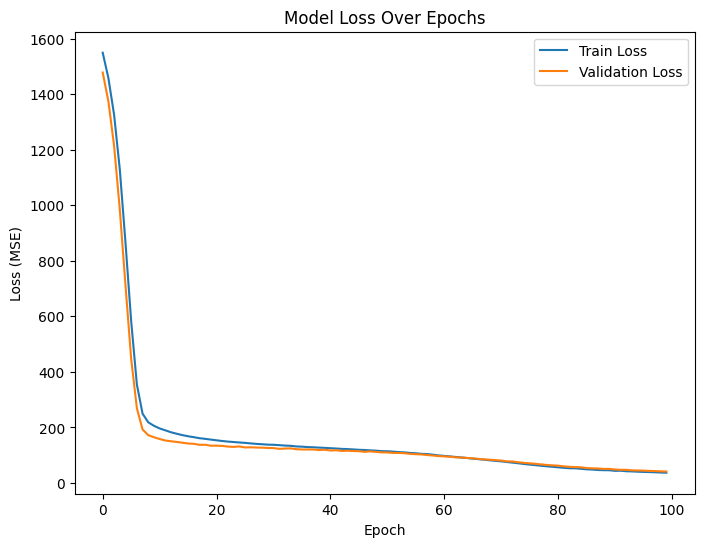

In [10]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
